In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('raw_data.csv', sep=',', index_col=None)
data.head(10)

,country,university_name,city,about,activities,books,games,interests,education_form,education_status,faculty_name
0,Россия,СПбПУ Петра Великого (Политех),Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Россия,УрГЭУ (СИНХ),Екатеринбург,NaN,NaN,NaN,NaN,NaN,заочное отделение,выпускник специалист,Заочный
2,Россия,МГТУ им. Г. И. Носова,Магнитогорск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Россия,ЮРГУЭС,Константиновск,NaN,NaN,NaN,NaN,NaN,очное отделение,студентка специалист,Социально-гуманитарный
4,Россия,АГУ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Майкоп,NaN,NaN,NaN,NaN,NaN,экстернат,NaN,Юридический факультет,NaN
6,Россия,МГУ,Москва,NaN,NaN,yoz,NaN,bmx extreme sports,очное отделение,выпускник бакалавр,Психологии
7,Россия,МИРЭА (до 2015),Москва,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Россия,КГУ,Сургут,хочу всё сразу побольше,найду выгодное решение развитии вашего бизнеса,роберт кийосаки богатый папа бедный папа квадр...,NaN,бизнес финансы семья развитие,NaN,NaN,NaN
9,Россия,БВМИ им. Ф. Ф. Ушакова (КВВМУ),Калининград,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ракетно-артиллерийского вооружения надводных к...


In [5]:
datav2 = data.drop(columns=['country', 'education_status', 'city', 'education_form', 'education_status'])

datav2 = datav2[
    ~(datav2['about'].isna() 
      & datav2['activities'].isna() 
      & datav2['books'].isna() 
      & datav2['games'].isna() 
      & datav2['interests'].isna()
    )
]
datav2 = datav2[~datav2['university_name'].isna()]
datav2 = datav2[~datav2['faculty_name'].isna()]
datav2 = datav2.fillna('').astype(str)
datav2

,university_name,about,activities,books,games,interests,faculty_name
6,МГУ,,,yoz,,bmx extreme sports,Психологии
31,КГМУ,сразу отвечаю часто задаваемы вопросы гкб сп б...,врачнейрохирург первой категории,,,обожаю отдыхать,Лечебный
32,РАНХиГС при Президенте РФ (бывш. АНХ при Прави...,умная скромная блондинка,могу просто стесняюсь,ромео джульетта евгений онегин капитанская доч...,люблю играть беситься,музыка кино танцы адреналин шоколад книги инте...,Финансов и банковского дела
36,ОТИ НИЯУ МИФИ,очень рисковый мной нелегкозато надёжно,,,жизнь,,Электрификации промышленных предприятий
39,한국학중앙연구원 (Academy of Korean Studies),хороший ♥ c ═════════════════════════════ ║▌│█...,,,,ssssss sssssss ssssssss ssssssssss ssssssss ss...,경제학
...,...,...,...,...,...,...,...
1307408,КемГИК (бывш. КемГУКИ),всё написано абсолютный спам неправда всё напи...,,,,,Режиссуры и актерского мастерства
1307425,ЮУрГГПУ (бывш. ЧГПУ),люблю людей ۩۞۩۩۞۩ ۩۞۩۩۞۩ ۩۞۩۩۞۩ ۩۞۩ ۩۞۩ ۩۞۩۩۞...,домашний образ жизни,пахороните плинтусом,,наука культура,Исторический
1307431,ЮУрГУ (НИУ),чтото нужно написать ох,продажа одежды интернете привожу вещи заказ ал...,пауло коэлье кен кизи олдос хаксли,желающих сорудничать минимальный оптовый заказ...,правила оформления заказа читайте заметках,Факультет экономики и управления
1307432,КНИТУ-КАИ им. А. Н. Туполева,пpoчиtaйтe oбязateльho bкoнтакте coвмecтнo c f...,,,,,Экономической теории и права


In [6]:
from collections import Counter

UNK_TOKEN_IDX = -1
FILL_IDX = 0

class Vocabulary:
    def __init__(self):
        self.word_to_index = dict()
        self.index_to_word = dict()
    
    def add_token(self, token):
        if token not in self.word_to_index:
            index = len(self.word_to_index) + 1
            self.word_to_index[token] = index
            self.index_to_word[index] = token
    
    def __getitem__(self, token):
        return self.word_to_index.get(token, UNK_TOKEN_IDX)
    
    def word(self, index):
        return self.index_to_word.get(index, '<unk>')
    
    def __len__(self):
        return len(self.word_to_index)

class Vectorizer:
    def __init__(self, vocab):
        self.vocab = vocab
    
    def vectorize(self, text: str, vector_lenght: int) -> list:
        vector = np.zeros(vector_lenght)
        indices = [self.vocab[word] for word in text.split()]
        vector[:min(len(indices), vector_lenght)] = indices[:min(len(indices), vector_lenght)]
        
        return vector
    
    @classmethod
    def from_data(cls, data, cutoff=2):
        counter = Counter()
        
        for sample in data:
            for word in sample.split(' '):
                counter[word.strip()] += 1
                
        vocab = Vocabulary()
        
        for word, word_count in counter.items():
            if word_count >= cutoff:
                vocab.add_token(word)
                
        return cls(vocab)

In [7]:
merged_series = datav2[['about', 'activities', 'books', 'games', 'interests']] \
    .agg(' '.join, axis=1)

datav3 = datav2.drop(columns = ['about', 'activities', 'books', 'games', 'interests'])
datav3['info'] = merged_series

vectorizer = Vectorizer.from_data(merged_series, cutoff=10)
len(vectorizer.vocab)

78904

(count    381219.000000
 mean         26.635254
 std          86.902287
 min           1.000000
 25%           5.000000
 50%          10.000000
 75%          26.000000
 max        5068.000000
 Name: info, dtype: float64,
 21.0)

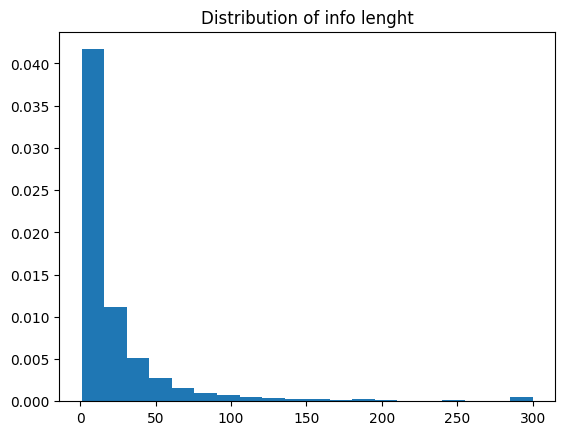

In [8]:
lengths = datav3['info'].apply(lambda x: len(x.split()))

plt.hist(lengths.clip(upper=300), density=True, bins=20)
plt.title(label='Distribution of info lenght')
VEC_SIZE = 50
lengths.describe(), np.quantile(lengths, q=0.7) # Выберем размер набора слов равным 50

In [9]:
datav4 = datav3.copy()
X = datav4['info'].apply(lambda x: x.strip()).values
y = datav4[['university_name', 'faculty_name']].agg(' ~~~~> '.join, axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KDTree

X_tokenized = np.array([vectorizer.vectorize(text, VEC_SIZE) for text in X])
vocab_max_index = max(vectorizer.vocab.index_to_word.keys())
vocab_min_index = min(vectorizer.vocab.index_to_word.keys())

encoder = LabelEncoder()
Y_labeled = encoder.fit_transform(y)

In [11]:
from thefuzz import fuzz
from thefuzz import process

correspondences = dict(zip(y, X))
process.extract('аниме тетрадь смерти, туризм, музыка', 
                choices=correspondences, 
                limit=20,
                scorer=fuzz.token_sort_ratio)

[('охота рыбалка туризм музыка',
  59,
  'ВА ВПВО ВС РФ (бывш. СВЗРКУ) ~~~~> Инженерный'),
 ('темная башня  спорт музыка',
  58,
  'Университет ИТМО ~~~~> Компьютерных технологий и управления'),
 ('активный пофигизм   музыка сноуборд туризм',
  57,
  'ИГУМО ~~~~> Социология и PR'),
 ('законы мерфи  музыка спорт танцы',
  55,
  'БГТУ им. В. Г. Шухова ~~~~> Институт информационных технологий и управляющих систем'),
 ('автомобили туризм музыка', 55, 'РГСУ (бывш. РИСИ) ~~~~> ДТИ'),
 ('нету всякая нету нету музыка',
  55,
  'УИУ РАНХиГС при Президенте РФ (бывш. УрАГС) ~~~~> ГМУ'),
 ('артист режиссер   кино театр музыка книги', 55, 'ГИТИС ~~~~> Актерский'),
 ('музыка туризм фотографизм',
  54,
  'УлГПУ им. И. Н. Ульянова ~~~~> ф-т технологии и предпринимательства'),
 ('музыка спорт авто техника',
  54,
  'ВМИИ (бывш. ЛВВМИУ им. Ленина и ВВМИОЛУ им. Дзержинского) ~~~~> химический'),
 ('фэнтэзи прятки спорт музыка книги',
  54,
  'ЮУрГУ (НИУ) ~~~~> Международных отношений'),
 ('театр музыка ди

In [12]:
import pickle

class BaselineSolution():
    def __init__(self, correspondences):
        self.correspondences = correspondences

    def find_appropriate_variants(self, text, n=10):
        return process.extract(
            text, 
            choices=self.correspondences,
            limit=n, 
            scorer=fuzz.token_sort_ratio
        )

bsl = BaselineSolution(correspondences)
bsl.find_appropriate_variants('аниме тетрадь смерти, туризм, музыка', n=20)

[('охота рыбалка туризм музыка',
  59,
  'ВА ВПВО ВС РФ (бывш. СВЗРКУ) ~~~~> Инженерный'),
 ('темная башня  спорт музыка',
  58,
  'Университет ИТМО ~~~~> Компьютерных технологий и управления'),
 ('активный пофигизм   музыка сноуборд туризм',
  57,
  'ИГУМО ~~~~> Социология и PR'),
 ('законы мерфи  музыка спорт танцы',
  55,
  'БГТУ им. В. Г. Шухова ~~~~> Институт информационных технологий и управляющих систем'),
 ('автомобили туризм музыка', 55, 'РГСУ (бывш. РИСИ) ~~~~> ДТИ'),
 ('нету всякая нету нету музыка',
  55,
  'УИУ РАНХиГС при Президенте РФ (бывш. УрАГС) ~~~~> ГМУ'),
 ('артист режиссер   кино театр музыка книги', 55, 'ГИТИС ~~~~> Актерский'),
 ('музыка туризм фотографизм',
  54,
  'УлГПУ им. И. Н. Ульянова ~~~~> ф-т технологии и предпринимательства'),
 ('музыка спорт авто техника',
  54,
  'ВМИИ (бывш. ЛВВМИУ им. Ленина и ВВМИОЛУ им. Дзержинского) ~~~~> химический'),
 ('фэнтэзи прятки спорт музыка книги',
  54,
  'ЮУрГУ (НИУ) ~~~~> Международных отношений'),
 ('театр музыка ди

In [13]:
with open('correspondences.pickle', 'wb') as f:
    pickle.dump(correspondences, f, protocol=pickle.HIGHEST_PROTOCOL)